In [10]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [11]:
# reading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [12]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# preparing data
y_train = train["label"]
x_train = train.iloc[:,1:]
x_train = x_train / 255.0  # data range [0, 1]
x_test = test / 255.0      # data range [0, 1]
#x_train = x_train.values.reshape(-1,28,28,1)   # input image dimensions: 28*28*1
#x_test = x_test.values.reshape(-1,28,28,1)
y_train = keras.utils.to_categorical(y_train, num_classes = 10)  # convert a class vector (integers) to binary class matrix
print('training data shape', x_train.shape)
print('testing data shape', x_test.shape)
print('training result shape', y_train.shape)
print('training result example', y_train[0])

training data shape (42000, 784)
testing data shape (28000, 784)
training result shape (42000, 10)
training result example [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
# preparing training and testing data for model validation
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1)

KNN

k 1 completed
k 2 completed
k 3 completed
k 4 completed
k 5 completed
k 6 completed
k 7 completed
k 8 completed
k 9 completed


Text(0, 0.5, 'Accuracy on Validation Data')

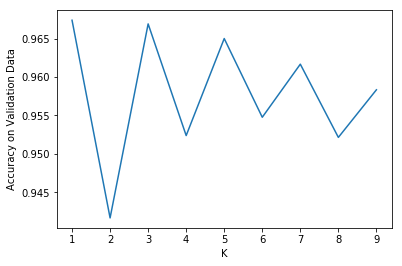

In [16]:
#tuning the parameter n_neighbors
scores = []

for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_val)
    scores.append(accuracy_score(Y_val,y_pred))    

plt.plot(k_range,scores)
plt.xlabel('K')
plt.ylabel('Accuracy on Validation Data')

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_val)
accuracy = (y_pred == Y_val).mean()
accuracy

0.994

In [22]:
# k-fold, n_neighbors=3 is taken according to the plot above
clf = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores 

KeyboardInterrupt: 